In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

Weighted_accuracy = tool_accuracy * volume_factor
Volume_factor = tool_requests / all_tools_requests


In [2]:
# read accuracy csv file
tools_accuracy_info = pd.read_csv("../data/tools_accuracy.csv")
tools_accuracy_info.head()

tool  tool_accuracy  total_requests  \
0  claude-prediction-offline      66.233766             231   
1   claude-prediction-online      73.538462             325   
2         prediction-offline      69.532755            4152   
3     prediction-offline-sme      77.647059              85   
4          prediction-online      70.135444           10484   

                   min                  max  
0  2024-05-10 14:54:40  2024-06-22 04:20:40  
1  2024-05-10 17:47:35  2024-07-04 21:55:25  
2  2024-05-10 14:14:55  2024-07-06 07:46:35  
3  2024-06-16 00:42:00  2024-06-21 15:04:40  
4  2024-05-10 14:11:15  2024-07-06 08:13:10

In [4]:
global_requests = tools_accuracy_info.total_requests.sum()
global_requests

57603

In [7]:
def get_weighted_accuracy(row, global_requests: int):
    '''Function to compute the weighted accuracy of a tool'''
    return row["tool_accuracy"] * (row["total_requests"]/global_requests)

In [8]:
tools_accuracy_info["weighted_accuracy"] = tools_accuracy_info.apply(lambda x: get_weighted_accuracy(x, global_requests), axis=1)
tools_accuracy_info.head()

tool  tool_accuracy  total_requests  \
0  claude-prediction-offline      66.233766             231   
1   claude-prediction-online      73.538462             325   
2         prediction-offline      69.532755            4152   
3     prediction-offline-sme      77.647059              85   
4          prediction-online      70.135444           10484   

                   min                  max  weighted_accuracy  
0  2024-05-10 14:54:40  2024-06-22 04:20:40           0.265611  
1  2024-05-10 17:47:35  2024-07-04 21:55:25           0.414909  
2  2024-05-10 14:14:55  2024-07-06 07:46:35           5.011892  
3  2024-06-16 00:42:00  2024-06-21 15:04:40           0.114577  
4  2024-05-10 14:11:15  2024-07-06 08:13:10          12.764960

# Painting the ranking

In [13]:
tools_accuracy_info = tools_accuracy_info.sort_values(by='weighted_accuracy', ascending=False)

<Axes: xlabel='weighted_accuracy', ylabel='tool'>

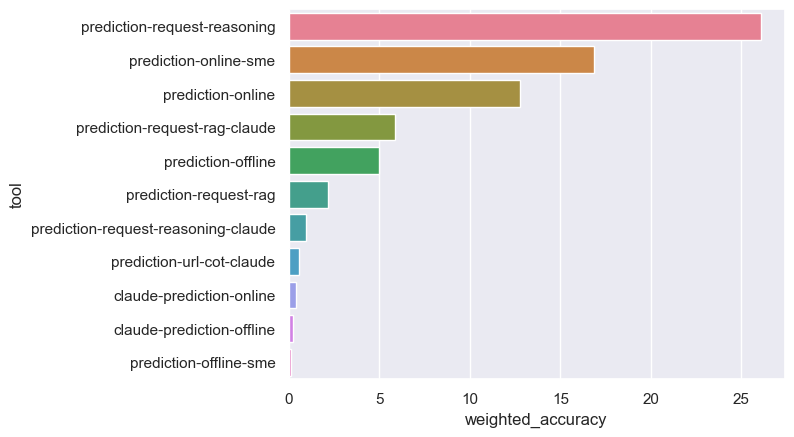

In [14]:
sns.set_theme(palette="viridis")
sns.barplot(tools_accuracy_info, x="weighted_accuracy", y="tool", hue="tool")

In [5]:
tools_accuracy_info = tools_accuracy_info.sort_values(by='tool_accuracy', ascending=False)

<Axes: xlabel='tool_accuracy', ylabel='tool'>

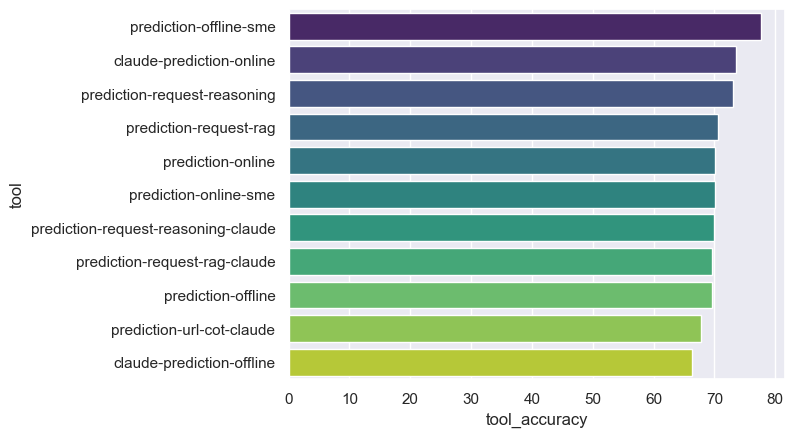

In [6]:
sns.set_theme(palette="viridis")
sns.barplot(tools_accuracy_info, x="tool_accuracy", y="tool", hue="tool", palette="viridis")